In [1]:
library(Seurat)
library(ggplot2)
library(dplyr)
library(stringr)
library(Sierra)
library(presto)
library(ggplot2)
library(msigdbr)
library(fgsea)
library(sctransform)
library(tidyverse)
setwd('/data/APAproject/post_qual/data/Dimitry_Velmeshev_ASD/')

Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
"replacing previous import 'GenomicRanges::union' by 'dplyr::union' when loading 'Sierra'"
Warning message:
"replacing previous import 'GenomicRanges::intersect' by 'dplyr::intersect' when loading 'Sierra'"
Warning message:
"replacing previous import 'GenomicRanges::setdiff' by 'dplyr::setdiff' when loading 'Sierra'"
Warning message:
"replacing previous import 'Gviz::tail' by 'utils::tail' when loading 'Sierra'"
Warning message:
"replacing previous import 'Gviz::head' by 'utils::head' when loading 'Sierra'"
Loading required package: Rcpp

Loading required package: data.table


Attaching package: 'data.table'


The following objects are masked from 'package:dplyr':

    between, first, last


Registered S3 method overwritten by 'cli':
  method     f

In [8]:
reference.file <- '/home/aiden/data/refgenome/refdata-gex-GRCh38-2020-A/genes//genes.gtf'
gtf_gr <- rtracklayer::import(reference.file)
gtf_TxDb <- GenomicFeatures::makeTxDbFromGFF(reference.file, format="gtf")

Import genomic features from the file as a GRanges object ... 
OK

Prepare the 'metadata' data frame ... 
OK

Make the TxDb object ... 
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."
OK



## Ok I already know that NRGNII has longer transcripts, lets just focus on that and
## see if we can replicate ct vs AD results

In [2]:
ge_so <- readRDS('rdata/Control_cell_types_GE_PFC.rds')
peaks_so <- readRDS('rdata/Control_celltypes_peaks.rds')
ge_so
peaks_so

An object of class Seurat 
65217 features across 30147 samples within 1 assay 
Active assay: RNA (65217 features, 2000 variable features)
 3 dimensional reductions calculated: pca, umap, tsne

An object of class Seurat 
176472 features across 52554 samples within 1 assay 
Active assay: RNA (176472 features, 0 variable features)
 1 dimensional reduction calculated: umap

In [4]:
peaks_so <- subset(peaks_so , subset = region == 'PFC')
peaks_so

An object of class Seurat 
176472 features across 30147 samples within 1 assay 
Active assay: RNA (176472 features, 0 variable features)
 1 dimensional reduction calculated: umap

In [7]:
table(peaks_so$cluster)


          AST-FB           AST-PP      Endothelial            IN-PV 
            1106             1836              680             1123 
          IN-SST          IN-SV2C           IN-VIP             L2/3 
            1414              442             1357             3701 
              L4             L5/6          L5/6-CC        Microglia 
            2245              996             1253             1320 
         Neu-mat       Neu-NRGN-I      Neu-NRGN-II Oligodendrocytes 
             963              799             2066             5892 
             OPC 
            2954 

In [11]:
peaks_so <- SetIdent(peaks_so, value = peaks_so$cluster)

[1] "4336 expressed peaks in feature types UTR3"
[1] "4046 peaks after filtering out A-rich annotations"
[1] "897 genes detected with multiple peak sites expressed"
[1] "2358 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."


-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

Warning message in vst(exp(alleffects), object):
"Dispersion function not parametric, applying log2(x+ 1) instead of vst...
"


[1] "Detecting shifts in 3'UTR length usage"


,genomic_feature(s),population1_pct,population2_pct,pvalue,padj,Log2_fold_change,SiteLocation,NumSites,FC_direction
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>
MAP2K4:chr17:12143273-12143830:1,UTR3,0.12778316,0.1461130,1.399461e-109,2.743724e-107,2.0718877,2,2,Up
NRXN3:chr14:79863964-79864494:1,UTR3,0.12245886,0.1448310,1.890747e-67,1.273824e-65,1.4665036,2,2,Up
NRXN3:chr14:79862011-79862541:1,UTR3,0.05759923,0.1087212,5.715739e-11,4.813469e-10,0.8740153,1,2,Up
SEPTIN7:chr7:35904888-35905348:1,UTR3,0.29961278,0.3245611,1.583924e-34,4.499871e-33,0.6631051,2,2,Up
SEPTIN7:chr7:35904331-35904853:1,UTR3,0.12584705,0.1590399,7.136661e-11,5.968749e-10,0.6035631,1,2,Up
PHYHIPL:chr10:59245537-59246592:1,UTR3,0.10067764,0.1514191,3.244331e-32,8.225949e-31,0.9704859,1,2,Up
PHYHIPL:chr10:59245651-59246341:1,UTR3,0.09777348,0.1444393,4.547804e-31,1.072372e-29,0.9857179,2,2,Up
CIRBP:chr19:1272750-1273196:1,UTR3,0.19941917,0.3018767,6.915095e-28,1.393658e-26,0.6561454,2,3,Up
AK5:chr1:77559510-77559966:1,UTR3,0.25314618,0.2117446,3.145246e-25,5.886102e-24,0.4553915,4,4,Up


[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 1.79896043503378e-15"


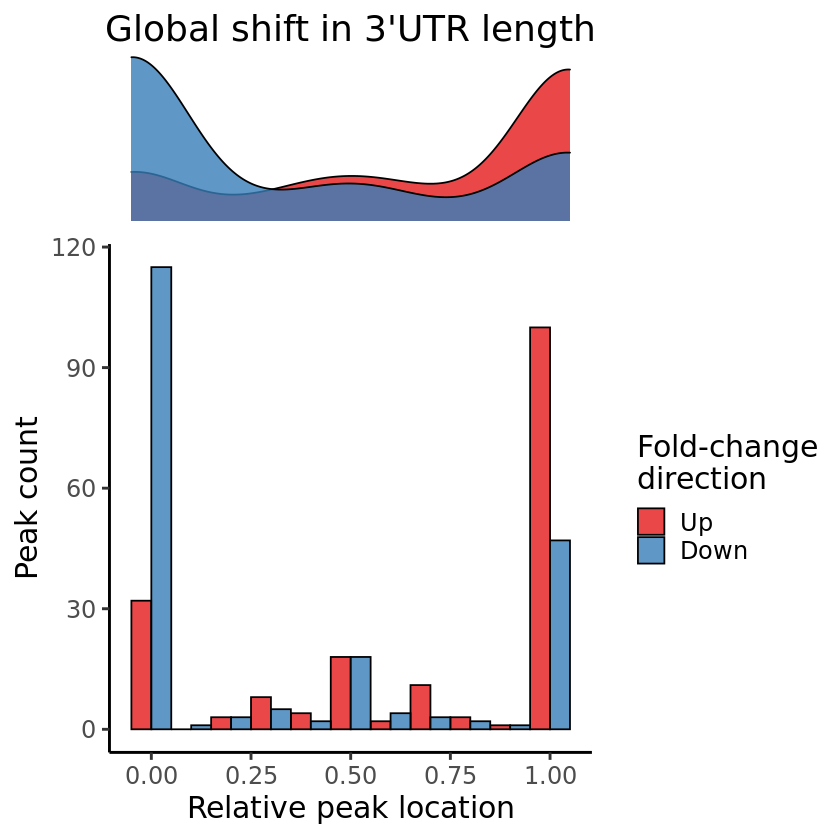

In [12]:
nrgn_utr_shift <- DetectUTRLengthShift(peaks.object = peaks_so, 
                                      gtf_gr = gtf_gr,
                                      gtf_TxDb = gtf_TxDb,
                                      population.1 = 'Neu-NRGN-II')
nrgn_utr_shift
PlotUTRLengthShift(nrgn_utr_shift)

In [13]:
## the block to run on the out put of DetectUTRshift dataframe

## 1-  read in the overall peaks annotation file for the study
peak.annotations <- read.table("Sierra_out_1/DimitryV_peaks_annotated.txt", 
                               header = TRUE,
                               sep = "\t",
                               row.names = 1,
                               stringsAsFactors = FALSE)

In [15]:
source('/home/aiden/codes/APA_stuff/post_qual/APA/usefull_functions.R')
case <- list(c('Neu-NRGN-II','nrgn_utr_shift'))
get_UTR_seqs(case, peaks_so, peak.annotations, gtf_TxDb)

[1] "processing the  Neu-NRGN-II results"


The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were no

In [24]:
ge_so <- SetIdent(ge_so, value = ge_so$cluster)

In [16]:
RBPs <- toupper(c("CG33714","EXC-7","HNRNPA1","HNRNPA1L2","HNRNPA2B1","HNRNPK",
                  "HRB87F","PCBP2","SRSF2","SRSF7","YBX1","HRB98DE","MSI","YBX1",
                  "CG17838","RBP9","MUB","CG7804","Tp_0225","Tv_0226","PF10_0214",
                  "Rbm42","An_0287"))

In [32]:
ge_so$nrgn <- 'other'
idx <- which(ge_so$cluster=='Neu-NRGN-II')
ge_so$nrgn[idx] = 'Neu-NRGN-II'
table(ge_so$nrgn)


Neu-NRGN-II       other 
       2066       28081 

In [33]:
ge_so <- SetIdent(ge_so, value = ge_so$nrgn)

Warning message in FetchData(object = object, vars = features, slot = slot):
"The following requested variables were not found (10 out of 13 shown): CG33714, EXC-7, HRB87F, HRB98DE, MSI, CG17838, RBP9, MUB, CG7804, TP_0225"
Warning message in SingleExIPlot(type = type, data = data[, x, drop = FALSE], idents = idents, :
"All cells have the same value of HNRNPA1."


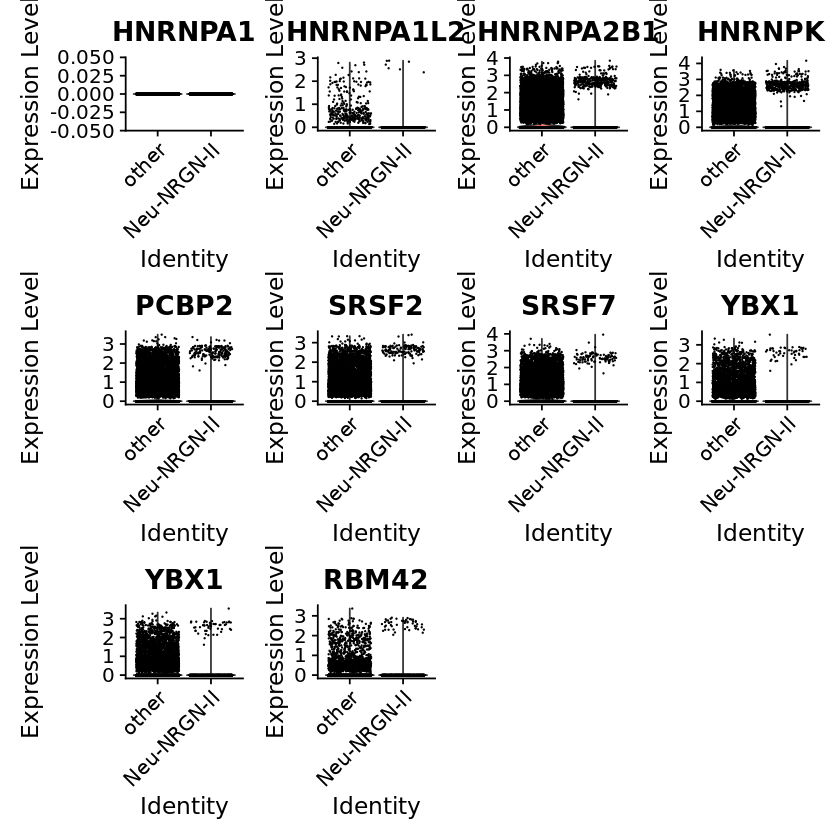

In [34]:
VlnPlot(ge_so, features = RBPs)